In [1]:
%matplotlib inline

In [178]:
import itertools 
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d

import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')


In [207]:
# https://github.com/matplotlib/matplotlib/issues/21688#issuecomment-974912574

class FancyArrowPatch3D(mpatches.FancyArrowPatch):
    def __init__(self, posA, posB, *args, **kwargs):
        mpatches.FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = list(zip(posA, posB))
        
    def do_3d_projection(self, renderer=None):
        xs3d,  ys3d , zs3d, = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
        

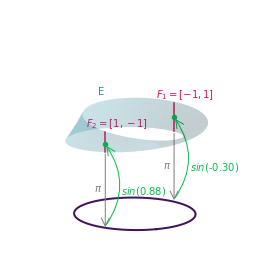

In [284]:

fig = plt.figure(figsize=(10,10))

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, color=pcd['total'], edgecolor=None, alpha=.25)
ax.text3D(0,-.65 , .65, "E", color=pcd['total'])

# z is up
# x is right
# y is left
zb = -1.5

f1 ={'ind':15, 'zoff':.5, 'fiber':r"$F_{1} = [-1, 1]$", 'section':r"$sin(k_{1})$"}
f2 ={'ind':43, 'zoff':.35, 'fiber':r"$F_{2} = [1, -1]$", 'section':r"$sin(k_{-1})$"}
     

for fd in [f1, f2]:
    fx = x[fd['ind']]
    fy = y[fd['ind']]
    fz = z[fd['ind']]
    ax.plot([fx, fx], [fy, fy], [fz, fz+fd['zoff']], color=pcd['fiber'])
    ax.text3D(fx, fy+.2, fz+fd['zoff'], fd['fiber'], va='bottom', ha='center', color=pcd['fiber'])

    fp = FancyArrowPatch3D((fx, fy, fz), (fx, fy, zb+.05),  arrowstyle='->', 
                                    mutation_scale=20, color='gray')
    ax.add_artist(fp)

   
    ty =  f1z + .25         
    ax.scatter(fx, fy, ty, color=pcd['section'])
    ft = FancyArrowPatch3D((fx, fy, zb+.1), (fx, fy, ty),  arrowstyle='->', 
                            connectionstyle='arc3,rad=.35', color=pcd['section'], 
                            mutation_scale=20)
    ax.add_patch(ft)

    mid = zb + (fz-zb)/2
    ax.text3D(fx, fy-.05, mid, r"$\pi$", color="gray", ha='right')
    ax.text3D(fx+.2, fy + .2, mid, r"$sin($" + f'{fx:.2f}' + r"$)$", color=pcd['section'], ha='left')
    

xo, yo = (0, 0)
width = .7
height =.1
t = np.linspace(0, 2*np.pi, 500)
ex =  np.cos(t)
ey = np.sin(t)
ax.plot(ex, ey, zb,  color=pcd['base'], lw=2)


ax.set_proj_type('ortho')
ax.view_init(15, -20)

ax.set_zlim(-1, 1)


ax.axis('off')

fig.savefig(paper_path/"fbtau", bbox_inches='tight', dpi=200)

In [230]:
ty

1.0687527643803132

In [229]:
x

array([ 0.75      ,  0.74435195,  0.72745652,  0.69946085,  0.66061318,
        0.61126707,  0.55188684,  0.48305358,  0.40547128,  0.31997232,
        0.22752152,  0.12921822,  0.02629552, -0.07988393, -0.18783605,
       -0.29596778, -0.40259419, -0.50596019, -0.60426684, -0.69570175,
       -0.77847331, -0.85084776, -0.91118845, -0.95799609, -0.98994896,
       -1.00594182, -1.00512223, -0.98692305, -0.95108998, -0.8977029 ,
       -0.82719016, -0.74033494, -0.63827313, -0.52248239, -0.39476233,
       -0.25720582, -0.11216212,  0.03780764,  0.18998157,  0.34153366,
        0.48959437,  0.63131385,  0.76392603,  0.88481186,  0.99156017,
        1.08202423,  1.15437267,  1.20713321,  1.23922808,  1.25      ,
        0.80555556,  0.79933818,  0.78075393,  0.75000661,  0.70743663,
        0.65352186,  0.58887851,  0.51426163,  0.4305649 ,  0.33881921,
        0.24018953,  0.1359697 ,  0.02757464, -0.0834704 , -0.1955438 ,
       -0.30694495, -0.4159151 , -0.52066163, -0.61938552, -0.71

In [161]:
posA = (0,0,0)
posB = (1,1,1)
xs, xy, xz = 

In [162]:
xs

(0, 1)